<a href="https://www.kaggle.com/code/othmaneabderrazik/house-pricing-detection-regression?scriptVersionId=265086227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

regression lineaire (area -> price)

In [4]:
data = df[['area', 'price']]
print(data.shape)

X = data[['area']].values
y = data['price'].values
print(X.shape, y.shape)

(545, 2)
(545, 1) (545,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [6]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()
print(X_scaled.shape, y_scaled.shape)

(545, 1) (545,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape)

(436, 1) (109, 1)


In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [9]:
y_pred_scaled = reg.predict(X_test)

In [10]:
X_test_orig = scaler_X.inverse_transform(X_test)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

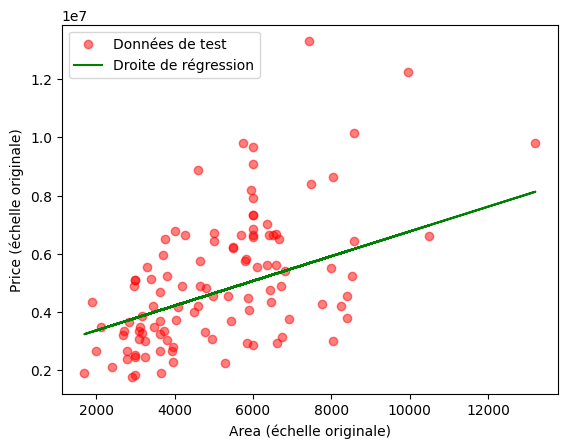

In [11]:
plt.scatter(X_test_orig, y_test_orig, c='red', label='Données de test', alpha=0.5)
plt.plot(X_test_orig, y_pred_orig, 'g-', label='Droite de régression')
plt.xlabel('Area (échelle originale)')
plt.ylabel('Price (échelle originale)')
plt.legend()
plt.show()

In [12]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print(f"Score R² train data: {train_score:.4f}")
print(f"Score R² test data : {test_score:.4f}")

# Affichage des paramètres du modèle
print(f"Coefficient (pente, beta_1) : {reg.coef_[0]:.2f}")
print(f"Intercept (beta_0) : {reg.intercept_:.2f}")

Score R² train data: 0.2850
Score R² test data : 0.2729
Coefficient (pente, beta_1) : 0.49
Intercept (beta_0) : -0.03


**Regression lineaire avec tout les caracteristiques**

In [13]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
categorical_features = ['furnishingstatus']

target = 'price'

In [14]:
for col in binary_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# c pour encoder les variables qui ont des valeurs de yes/no

In [15]:
# Encodage de furnishingstatus avec one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [16]:
# regroupement de tout les caracteristiques encodees/standarisees
encoded_features = [col for col in df.columns if col != target]
X = df[encoded_features].values
y = df[target].values

In [17]:
# Standardisation des features numériques uniquement
scaler_X = StandardScaler()
# Créer une copie de X pour préserver les colonnes non numériques
X_scaled = X.copy()
# Standardiser uniquement les colonnes numériques (indices correspondants)
numeric_indices = [encoded_features.index(col) for col in numeric_features]
X_scaled[:, numeric_indices] = scaler_X.fit_transform(X[:, numeric_indices])

# Standardisation de y (facultatif, inclus ici)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)

Forme de X_train : (436, 13)
Forme de X_test : (109, 13)


In [19]:
reg = LinearRegression().fit(X_train, y_train)

In [20]:
y_pred_scaled = reg.predict(X_test)

In [21]:
X_test_orig = X_test.copy()  # Copie pour préserver les colonnes non numériques
if numeric_indices:
    X_test_orig[:, numeric_indices] = scaler_X.inverse_transform(X_test[:, numeric_indices])

# Revenir à l'échelle originale pour y
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

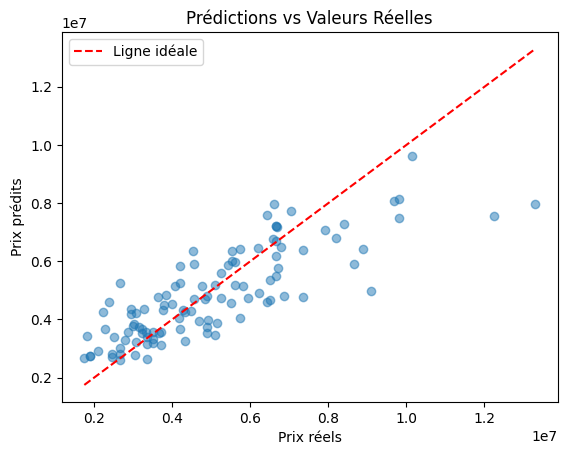

In [22]:
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', label='Ligne idéale')
plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.title('Prédictions vs Valeurs Réelles')
plt.legend()
plt.show()

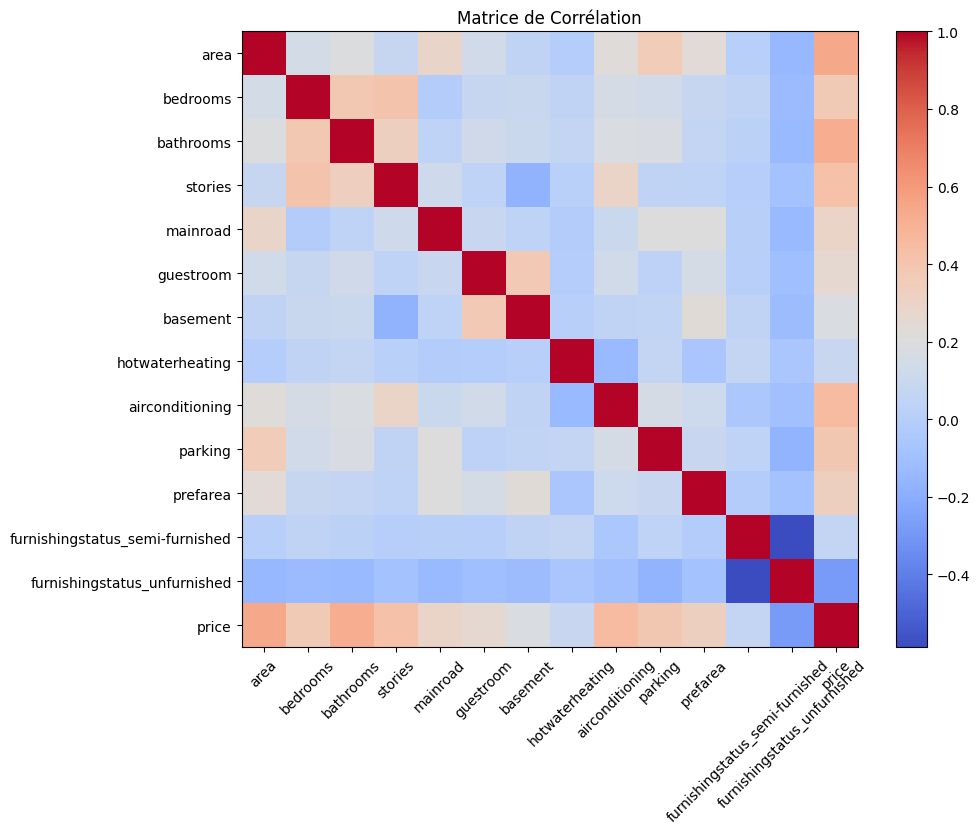

In [23]:
import numpy as np

corr_matrix = df[encoded_features + [target]].corr()
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm')
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)
plt.colorbar(im)
plt.title('Matrice de Corrélation')
plt.show()

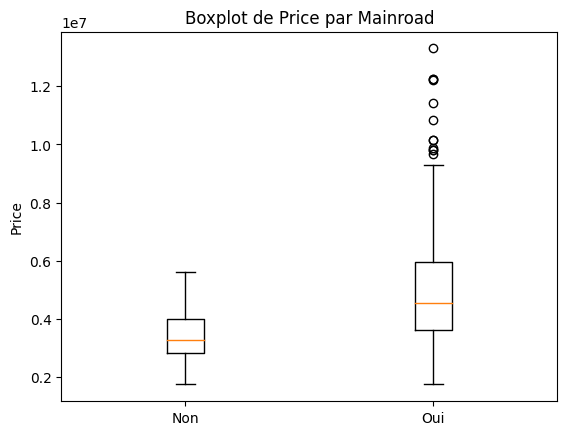

In [24]:
# Exemple pour une variable catégorique encodée (comme 'mainroad')
plt.boxplot([df[df['mainroad'] == 0]['price'], df[df['mainroad'] == 1]['price']])
plt.xticks([1, 2], ['Non', 'Oui'])
plt.ylabel('Price')
plt.title('Boxplot de Price par Mainroad')
plt.show()
# Répétez pour d'autres variables catégoriques comme 'furnishingstatus_unfurnished'